# Instantiation

In [24]:
import geopandas
import pandas
import starepandas
import pystare
import shapely
import matplotlib.pyplot as plt

## Points

### Creating a naive dataframe

In [2]:
cities = ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas']
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela']
latitudes = [-34.58, -15.78, -33.45, 4.60, 10.48]
longitudes = [-58.66, -47.91, -70.66, -74.08, -66.86]
data =  {'City': cities,  'Country': countries, 
         'Latitude': latitudes, 'Longitude': longitudes}

df = pandas.DataFrame(data)

### Creating a geodataframe

In [3]:
geom = geopandas.points_from_xy(df.Longitude, df.Latitude)
gdf = geopandas.GeoDataFrame(df, geometry=geom)
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


### Creating sids

In [7]:
# Those are all identical
sids = starepandas.sids_from_xy(df.Longitude, df.Latitude, level=5)
sids = starepandas.sids_from_xy_df(gdf, num_workers=2, level=5)
#sids = starepandas.sids_from_gdf(gdf, level=5)

sdf = starepandas.STAREDataFrame(gdf)
sdf.set_sids(sids, inplace=True)

In [9]:
trixels = sdf.make_trixels()
sdf.set_trixels(trixels, inplace=True)

In [10]:
sdf.sids

0    2663379193440875365
1    2867415364672350629
2    2723774768829278533
3    2667981979956219493
4    2494081632617553381
Name: sids, dtype: int64

In [11]:
sdf.geometry

0    POINT (-58.66000 -34.58000)
1    POINT (-47.91000 -15.78000)
2    POINT (-70.66000 -33.45000)
3      POINT (-74.08000 4.60000)
4     POINT (-66.86000 10.48000)
Name: geometry, dtype: geometry

In [12]:
sdf

,City,Country,Latitude,Longitude,geometry,sids,trixels
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000),2663379193440875365,"POLYGON ((-59.87026 -34.71551, -56.40359 -35.1..."
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000),2867415364672350629,"POLYGON ((-49.47476 -12.22984, -51.65012 -15.8..."
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000),2723774768829278533,"POLYGON ((-71.62565 -35.43810, -69.94333 -32.7..."
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000),2667981979956219493,"POLYGON ((-75.23698 2.57332, -73.80858 5.00265..."
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000),2494081632617553381,"POLYGON ((-67.79536 8.98813, -66.27210 11.3867..."


## Some plotting

<class 'starepandas.staredataframe.STAREDataFrame'>


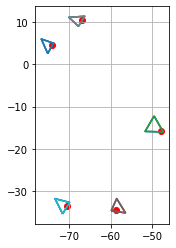

In [19]:
fig, ax = plt.subplots()
ax.grid(True)

sdf.plot(ax=ax)
sdf.plot(ax=ax, trixels=True)
sdf.plot(ax=ax, trixels=False, color='r')

sdf.plot(ax=ax, column='City')

## From granule

### Bootstrap

In [20]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
modis = starepandas.read_granule(fname, 
                                 add_sids=True,
                                 adapt_resolution=True)

### Use Sidecar

In [21]:
modis = starepandas.read_granule(fname, sidecar=True)
modis

,sids,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
0,4298473764500464809,8.493984e+08,147.089997,-22.959999,65.339999,-89.519998,NaN
1,4298458168380511209,8.493984e+08,146.999997,-23.539999,64.719999,-89.799998,NaN
2,4297394569014717897,8.493984e+08,146.919997,-24.099999,64.109999,-90.079998,NaN
3,4297300698872999369,8.493984e+08,146.839997,-24.639999,63.509999,-90.339998,NaN
4,4297290857922121161,8.493984e+08,146.759997,-25.159999,62.909999,-90.589998,NaN
...,...,...,...,...,...,...,...
109615,3727686638370615689,8.493987e+08,121.569997,-74.679998,62.229999,47.999999,NaN
109616,3727661374545790857,8.493987e+08,121.469997,-75.049998,62.819999,47.719999,NaN
109617,3727838256925064969,8.493987e+08,121.369997,-75.439998,63.419999,47.429999,NaN
109618,3727843063731949801,8.493987e+08,121.259997,-75.829998,64.019999,47.139999,NaN


## Polygons

### US State

In [22]:
us = geopandas.read_file('../tests/data/tl_2017_us_state.gpkg')
us = us.to_crs('EPSG:4326')
us['geom_simple'] = us.simplify(0.002)
us.set_geometry('geom_simple', inplace=True)

In [25]:
stare = starepandas.sids_from_gdf(us, level=9, force_ccw=True)
us = starepandas.STAREDataFrame(us, sids=stare)
us.add_trixels(inplace=True)
us._geometry_column_name

'geom_simple'

<AxesSubplot:>

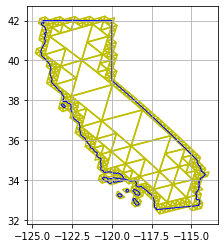

In [26]:
fig, ax = plt.subplots()
ax.grid(True)

state = us[us.NAME=='California']
state.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
state.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)

### Africa

In [27]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values(by='name', inplace=True)
africa = world[world.continent=='Africa']

In [29]:
stare = starepandas.sids_from_gdf(africa, level=7, force_ccw=True)
africa = starepandas.STAREDataFrame(africa, sids=stare)
trixels = africa.make_trixels()
africa.set_trixels(trixels, inplace=True)

In [30]:
africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids,trixels
82,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","[4485585228861014020, 4490651778441805829, 449...","MULTIPOLYGON (((0.00000 35.26439, -4.26668 28...."
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","[4464228315003092999, 4464263499375181831, 446...","MULTIPOLYGON (((12.02286 -4.04284, 12.42307 -4..."
54,11038805,Africa,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....","[4415849803380948999, 4416096093985570823, 441...","MULTIPOLYGON (((2.28947 6.63805, 1.35273 6.753..."
49,2214858,Africa,Botswana,BWA,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827...","[21392098230009861, 21955048183431173, 2589569...","MULTIPOLYGON (((24.29559 -19.47089, 22.03163 -..."
65,20107509,Africa,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...","[4500503402626678790, 4500644140115034118, 450...","MULTIPOLYGON (((0.33681 14.05776, -1.65941 14...."
75,11466756,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...","[4393402173988274183, 4393437358360363015, 439...","MULTIPOLYGON (((29.82200 -2.10228, 30.24394 -2..."
57,24994885,Africa,Cameroon,CMR,77240.0,"POLYGON ((14.49579 12.85940, 14.89336 12.21905...","[4413668372311441414, 4413809109799796742, 441...","MULTIPOLYGON (((11.63286 5.39078, 12.33798 4.1..."
66,5625118,Africa,Central African Rep.,CAF,3206.0,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ...","[4368491638549381126, 4521614025879977990, 452...","MULTIPOLYGON (((15.35858 4.85021, 16.17868 3.5..."
15,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...","[4594234569871327237, 4596486369685012485, 460...","MULTIPOLYGON (((20.83798 11.25168, 16.43269 11..."
67,4954674,Africa,Congo,COG,30270.0,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ...","[4432949408216121350, 4433230883192832006, 443...","MULTIPOLYGON (((14.68006 0.27864, 16.65430 -0...."


<AxesSubplot:>

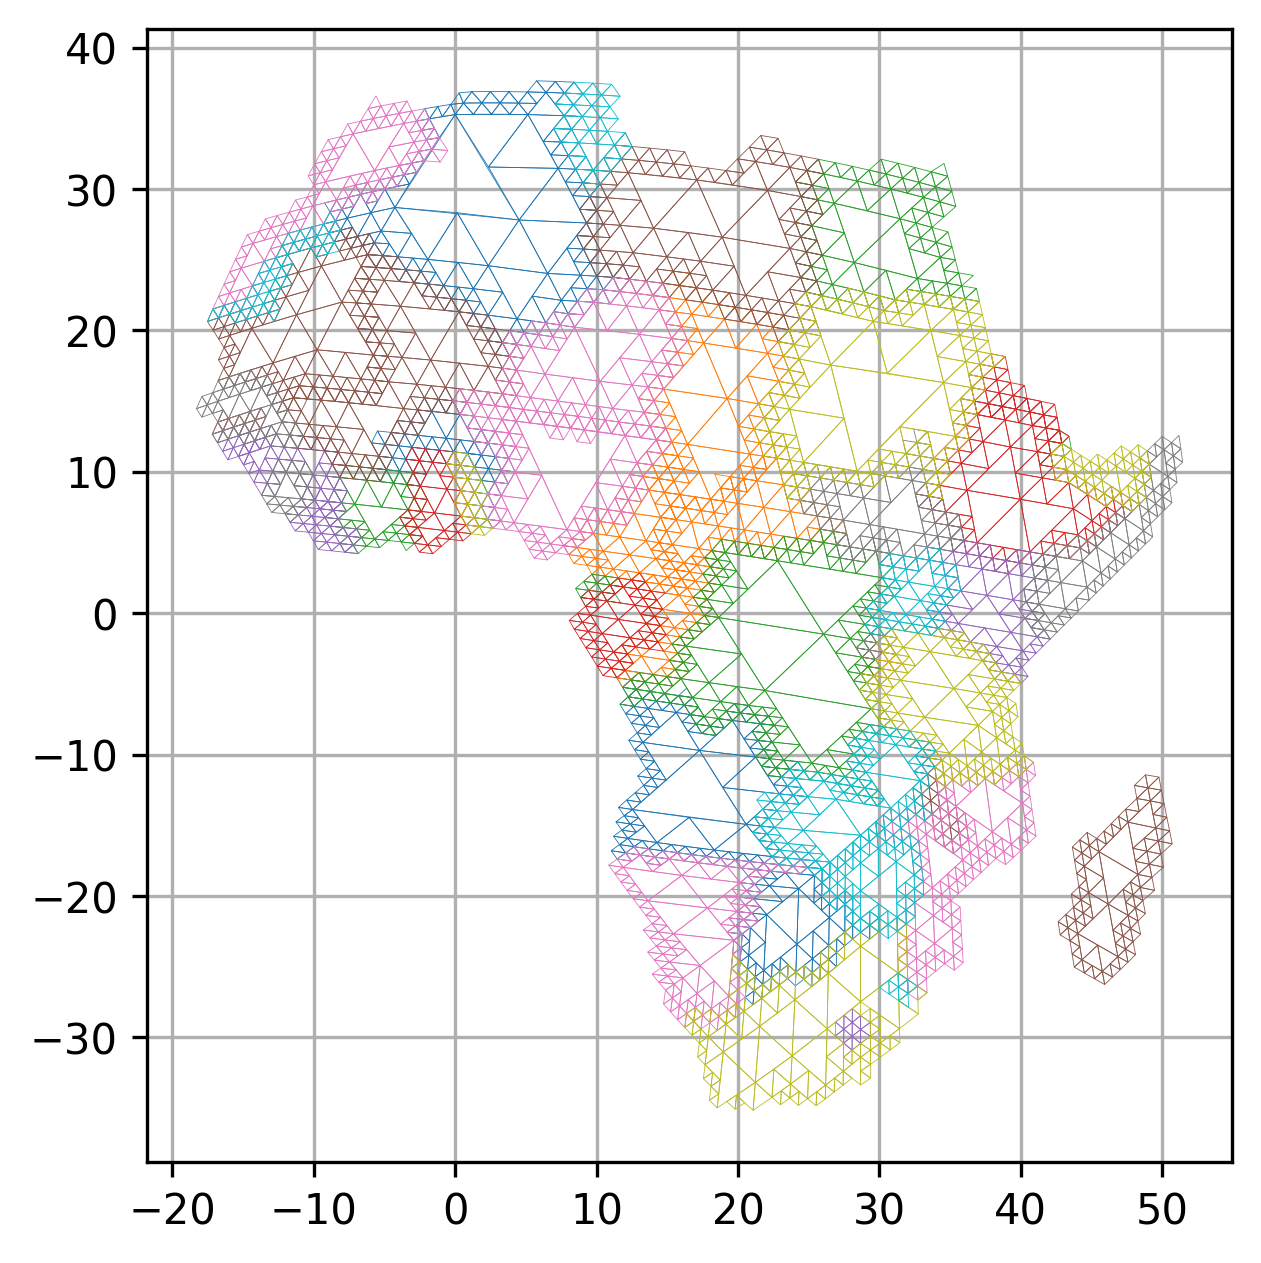

In [31]:
fig, ax = plt.subplots(figsize=(13,5), dpi=300)
ax.grid(True)

africa.plot(ax=ax, trixels=True, boundary=True, column='name', linewidth=0.2)

### Holes in RSA

In [32]:
rsa = africa[africa.name=='South Africa']

<AxesSubplot:>

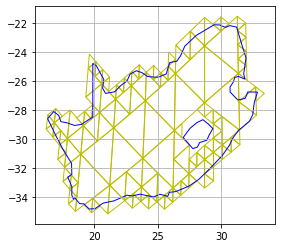

In [33]:
fig, ax = plt.subplots()
ax.grid(True)

rsa.plot(ax=ax, trixels=True, boundary=True, color='y', lw=1, zorder=0)
rsa.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', lw=1, zorder=1)

In [35]:
p = rsa.iloc[0].geometry
interior = starepandas.sids_from_ring(p.interiors[0], level=12, force_ccw=False)

### Puerto Rico (GPKG)

In [5]:
file = '../tests/data/caribbean.gpkg'
gdf = geopandas.read_file(file)

# Sanitation
gdf.rename(columns={'NAME_0': "name"}, inplace=True)
gdf.sort_values(by='name', inplace=True)
gdf.set_index('ISO', inplace=True)
gdf = gdf[['name', 'geometry']]

# Adding simple geom
gdf['geom_simple'] = gdf.simplify(0.001)
gdf.set_geometry('geom_simple', inplace=True)

In [6]:
gdf = gdf[gdf['name']=='Puerto Rico']
sdf = starepandas.STAREDataFrame(gdf)

In [16]:
sids = starepandas.sids_from_gdf(sdf, level=14, force_ccw=True)
#sdf.set_sids(sids, inplace=True)

In [21]:
sids

array([[2515652951897276430, 2515652954044760078, 2515652956192243726,
        ..., 2515549557002076174, 2515549559149559822,
        2515549561297043470]], dtype=object)

In [43]:
trixels = sdf.make_trixels()
sdf.set_trixels(trixels, inplace=True)

<AxesSubplot:>

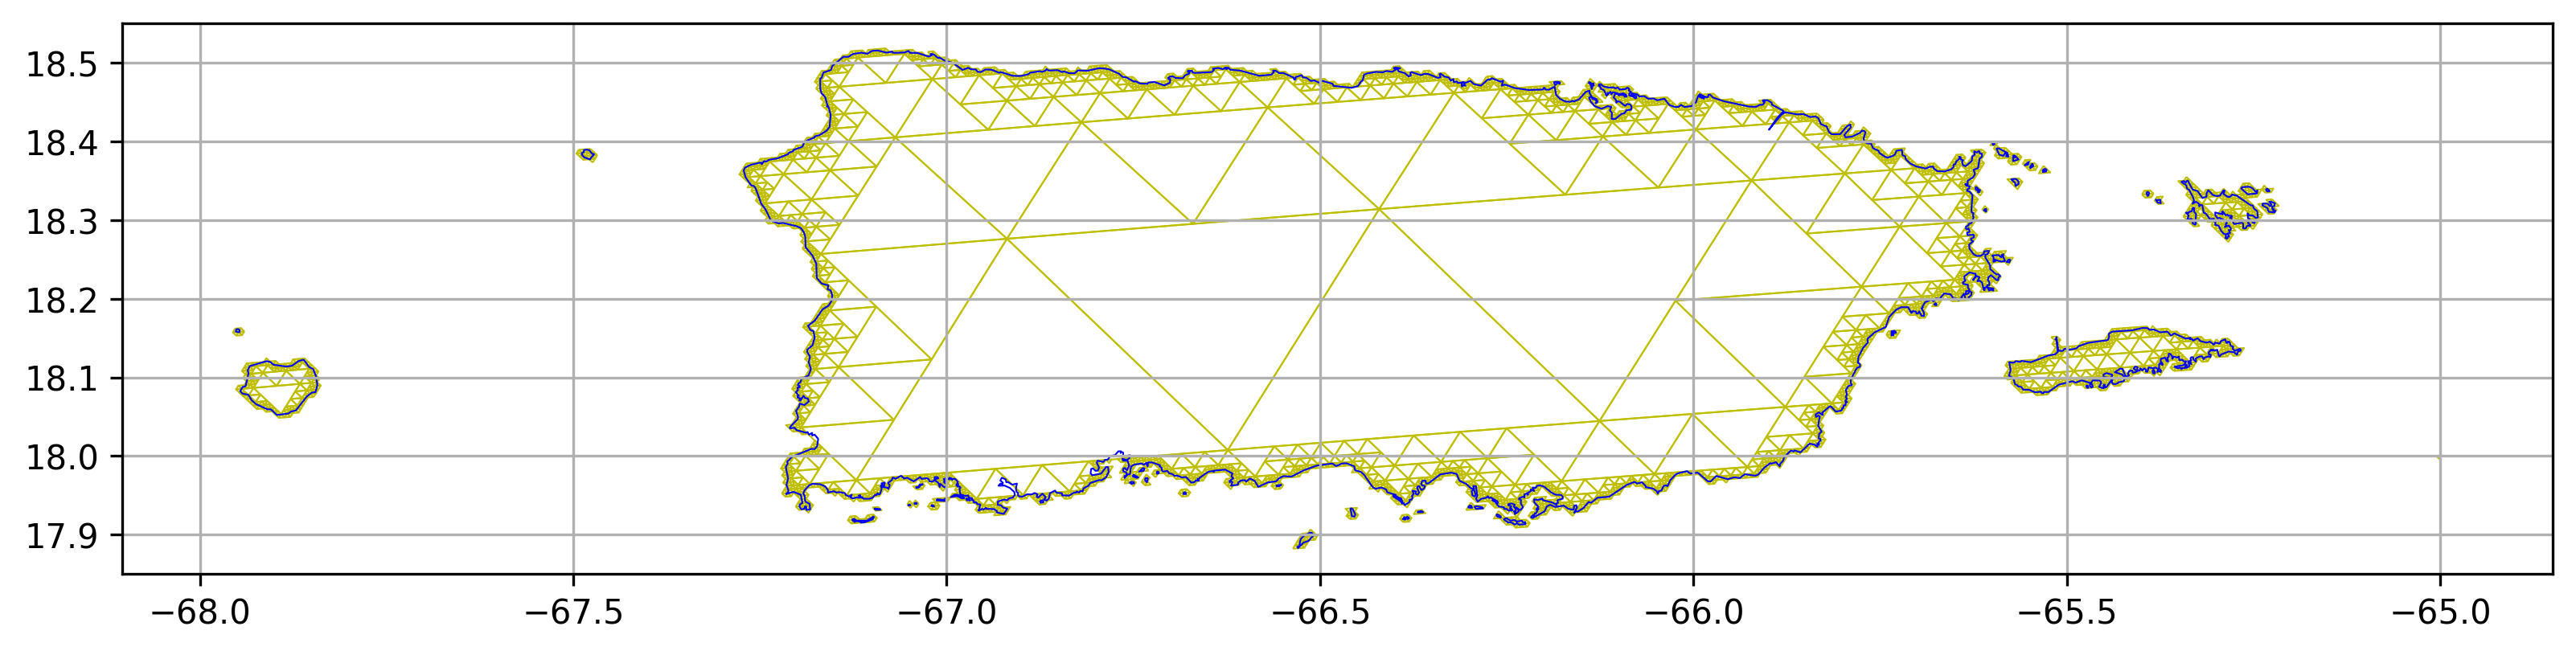

In [47]:
fig, ax = plt.subplots(figsize=(13,5), dpi=300)
ax.grid(True)

sdf.plot(ax=ax, trixels=True, color='y', lw=0.5, zorder=0)
sdf.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', lw=0.5, zorder=1)